In [72]:
from scipy import integrate


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [111]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

def set_basic_graph():
    figure(figsize=(15, 15))
    
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.ylim(-2, 2)
    plt.xlim(-1, 1)
    
    x_range = range(-1, 2)
    x_labels = [r"$-T$", 0, r"$T$"]
    plt.xticks(x_range, x_labels)
    
    return linspace(-3,3,5000) # precision(sampling freq')


def cal_b(n, T, tau):
    return\
        lambda n: (4/T) * integrate.quad(lambda t: 
                               sin(n*(2*pi/T)*t), 
                               0, 
                               (tau/2))[0]

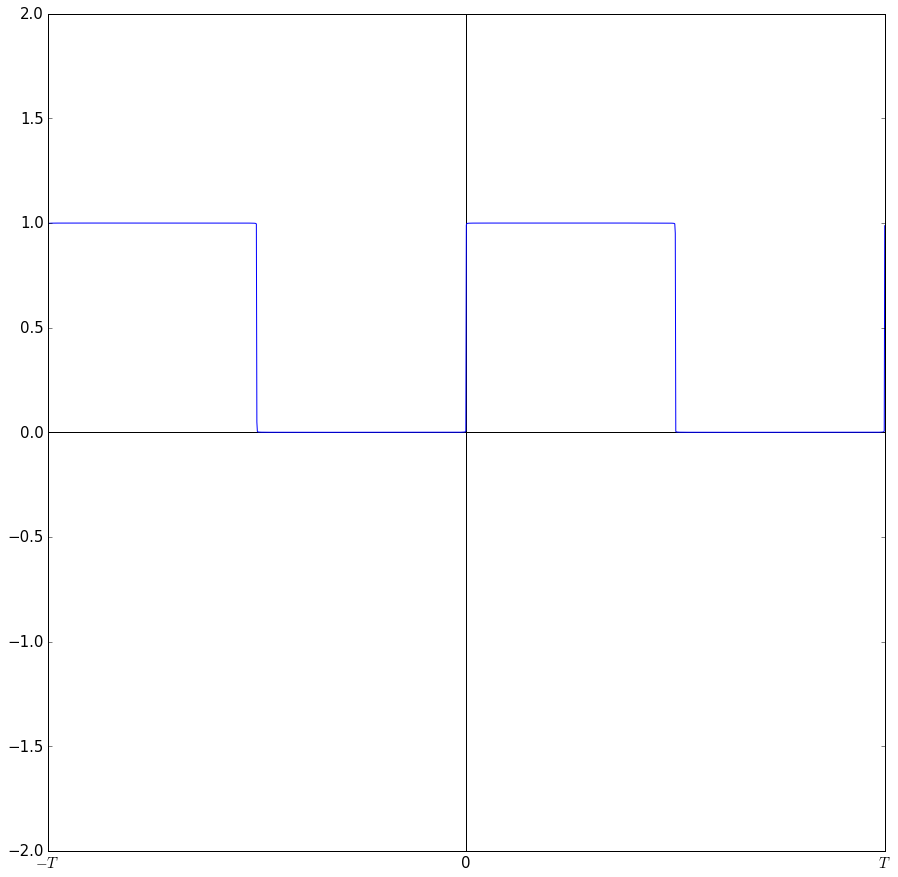

In [122]:
amp = 1
T = 1
tau = T/2
w0 = 2 * pi * T
t = set_basic_graph()

a0 = tau/T * amp

#preallocate the output array
mags_odd = zeros(len(t)) 
f = zeros(len(t))

for n in arange(1,10000,2):
    mags_odd += (2/pi) * ((1/n)*sin(n*w0*t))
f = a0 + mags_odd

plot(t, f)

In [133]:
from numpy import fft

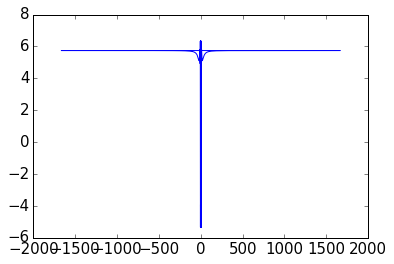

In [137]:
Y = np.fft.fft(f)/n # fft computing and normalization
Y = Y[range(n/2)]

ax[1].plot(frq,abs(f),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

array([ 5.24596107,  5.24506814,  5.24239428, ...,  5.24239428,
        5.24506814,  5.24596107])

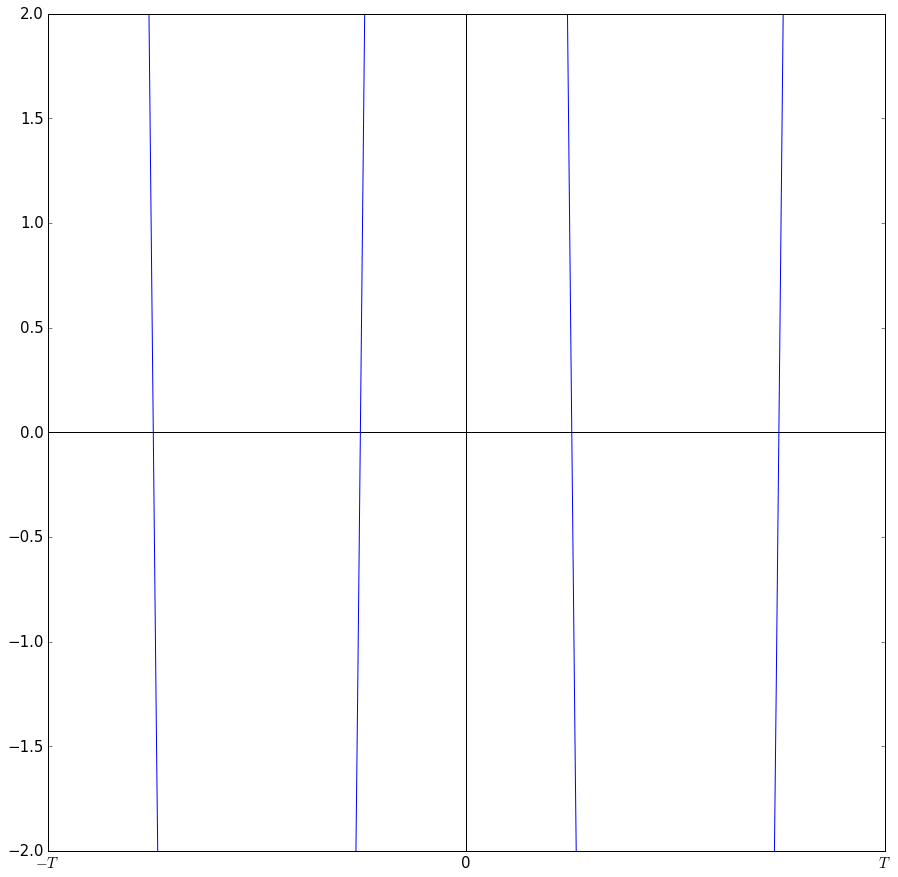

In [150]:
amp = 1
T = 1
tau = T/2
w0 = 2 * pi / T
t = set_basic_graph()

a0 = tau/T * amp

#preallocate the output array
#mags_odd = zeros(len(t))
mags_odd = 0
odds = zeros(len(t))
f = zeros(len(t))

for n in arange(1,10,2):
    mags_odd = (2/n*pi) * sin(n*pi*tau/T)
    odds += mags_odd * cos(n*w0*t)
    

f = a0 + odds

plot(t, f)
odds

In [114]:
cal_b(n, T, tau)(2)

0.6366197723675814

In [217]:
from scipy import signal
def pwm_generator(l, amp=1, duty=0.5):
    return (lambda duty:
                list(map(lambda elem: 0 if elem < duty else amp, l))
           )((1-duty)*amp)

def make_square_odd(period=1, amp=1, duty=0.5):
    def _makemake_square_odd(w0):
        return (
            lambda square:
                pwm_generator(square, amp, duty)
            )(amp * abs(signal.sawtooth(w0*t)))
    return _makemake_square_odd(2*pi/period)

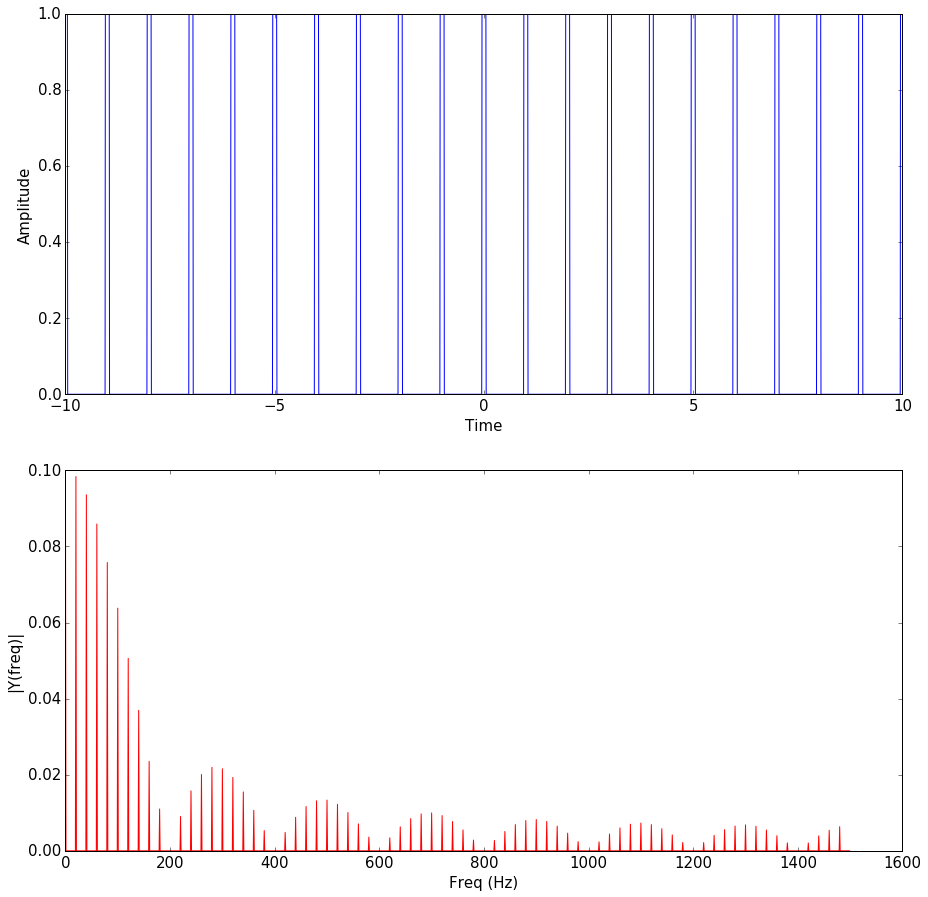

In [220]:
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(-10,10,Ts) # time vector


#ff = 1;   # frequency of the signal
T = 1
y = make_square_odd(period=T, duty=0.1)
n = len(y) # length of the signal

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(int(n/2))]



k = np.arange(n)
#T = 1#n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range



#plt.axhline(0, color='black')
#plt.axvline(0, color='black')
#plt.ylim(-2, 2)
#plt.xlim(-5, 5)



fig, ax = plt.subplots(2, 1, figsize=(15,15))

ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')

ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

In [196]:
y = make_square_odd(freq=frq, duty=0.5)


n = len(y) # length of the signal
n

300